In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier

In [2]:
#Import Dataset
data= pd.read_csv("Wine.csv")

In [3]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [3]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [5]:
data.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
data=data.dropna(axis = 0)

In [8]:
data['Customer_Segment'].unique()

array([1, 2, 3], dtype=int64)

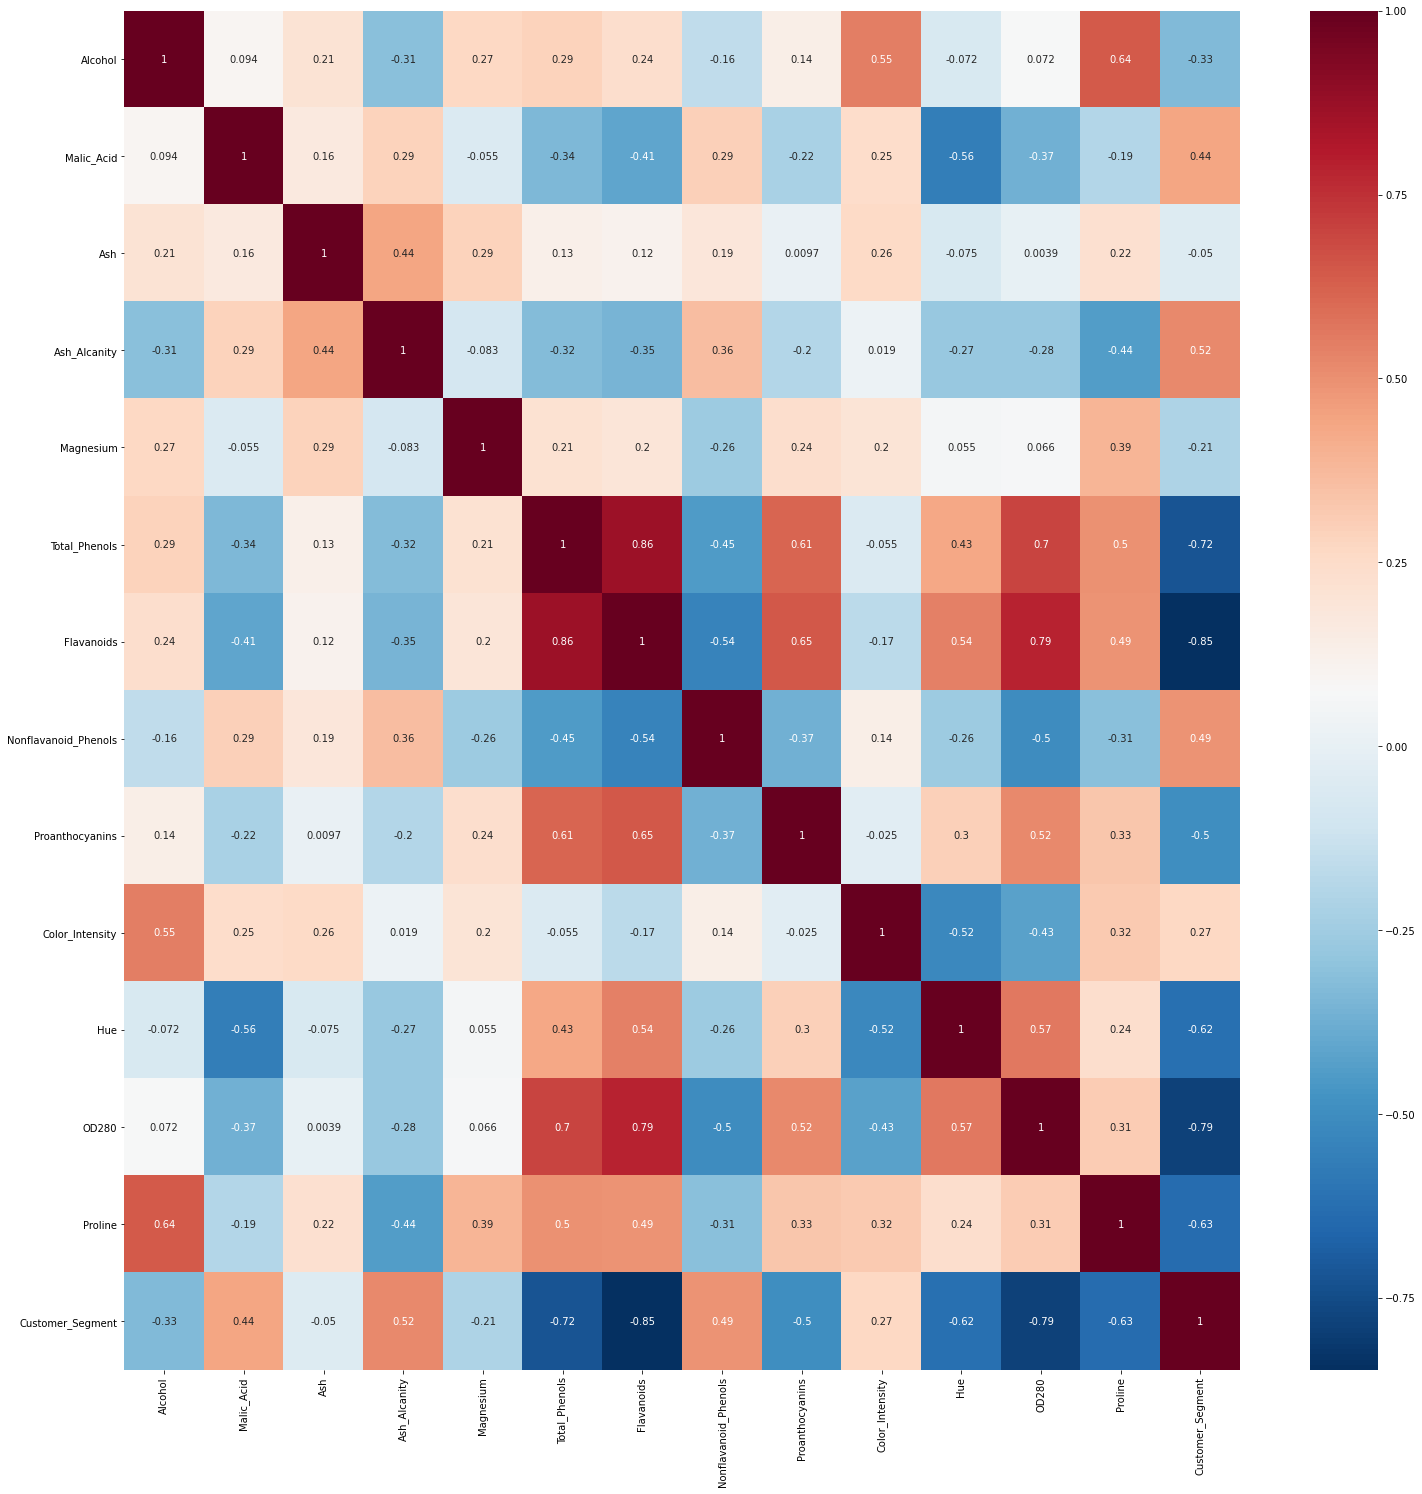

In [9]:
wine_correlation = data.corr()
plt.figure(figsize=(25,25))
sns.heatmap(wine_correlation, annot=True, cmap ="RdBu_r");

In [10]:
df = data.drop(["Flavanoids"], axis=1)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,0.39,1.82,4.32,1.04,2.93,735,1


C:\Users\david.o\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\david.o\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\david.o\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\david.o\Anaconda

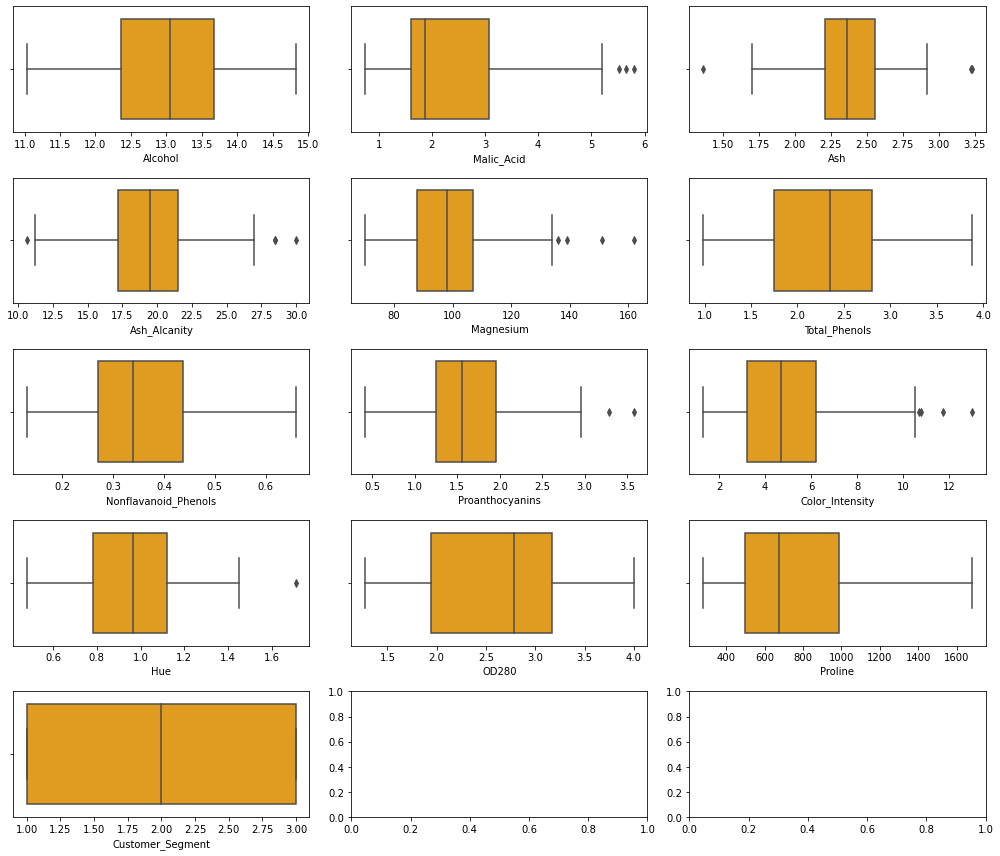

In [11]:
# Box plot for each attribute
fig, ax = plt.subplots(5,3, figsize=(14,12))
axes_ = [axes_row for axes in ax for axes_row in axes]
for i,c in enumerate(df.columns):
    sns.boxplot(df[c], ax = axes_[i], color = 'orange')
    plt.tight_layout()

In [12]:
f1=df

In [13]:
#Find missing values
f1.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [14]:
from scipy import stats
z = np.abs(stats.zscore(f1))
threshold = 1.8
print(z)
f1 = f1[(z < 1.8).all(axis=1)]

[[1.51861254 0.5622498  0.23205254 ... 1.84791957 1.01300893 1.21394365]
 [0.24628963 0.49941338 0.82799632 ... 1.1134493  0.96524152 1.21394365]
 [0.19687903 0.02123125 1.10933436 ... 0.78858745 1.39514818 1.21394365]
 ...
 [0.33275817 1.74474449 0.38935541 ... 1.48544548 0.28057537 1.37386437]
 [0.20923168 0.22769377 0.01273209 ... 1.40069891 0.29649784 1.37386437]
 [1.39508604 1.58316512 1.36520822 ... 1.42894777 0.59516041 1.37386437]]


C:\Users\david.o\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\david.o\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\david.o\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\david.o\Anaconda

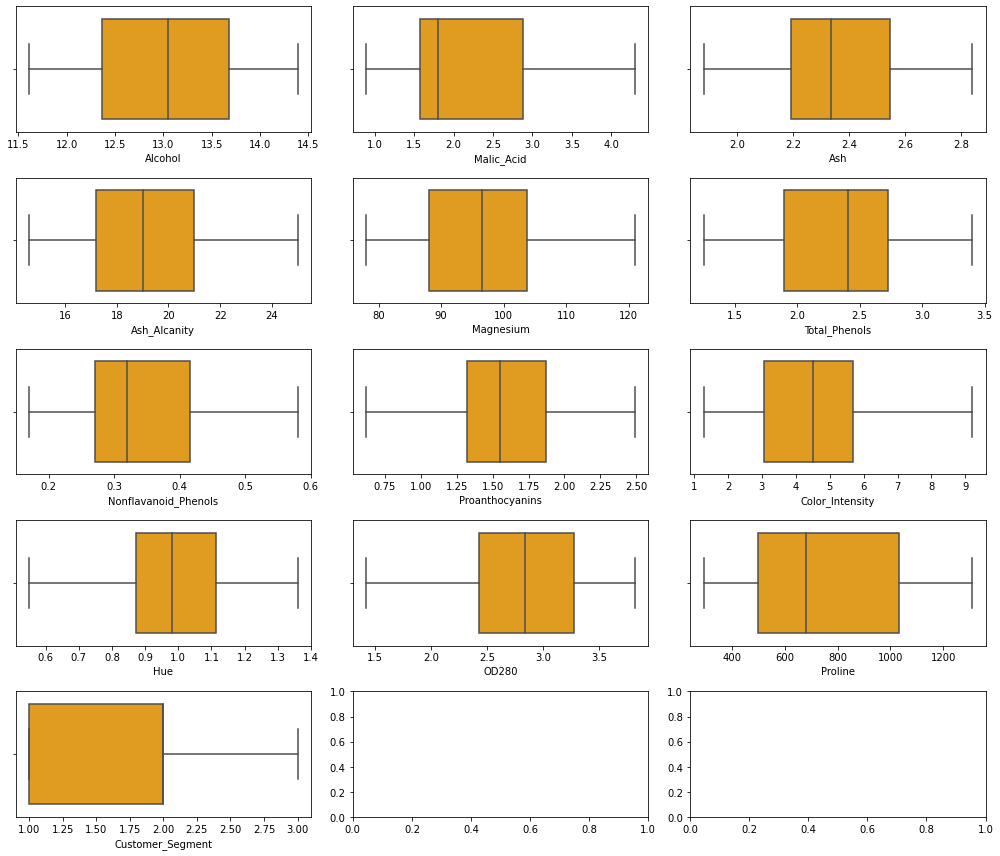

In [15]:
# Box plot for each attribute
fig, ax = plt.subplots(5,3, figsize=(14,12))
axes_ = [axes_row for axes in ax for axes_row in axes]
for i,c in enumerate(f1.columns):
    sns.boxplot(f1[c], ax = axes_[i], color = 'orange')
    plt.tight_layout()

In [16]:
# seperate the label and featuers
x = f1.drop('Customer_Segment', axis=1)
y = f1['Customer_Segment']

In [42]:
x

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
6,14.39,1.87,2.45,14.6,96,2.50,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,0.31,1.25,5.05,1.06,3.58,1295
9,13.86,1.35,2.27,16.0,98,2.98,0.22,1.85,7.22,1.01,3.55,1045
11,14.12,1.48,2.32,16.8,95,2.20,0.26,1.57,5.00,1.17,2.82,1280
15,13.63,1.81,2.70,17.2,112,2.85,0.30,1.46,7.30,1.28,2.88,1310
...,...,...,...,...,...,...,...,...,...,...,...,...
163,12.96,3.45,2.35,18.5,106,1.39,0.40,0.94,5.28,0.68,1.75,675
168,13.58,2.58,2.69,24.5,105,1.55,0.39,1.54,8.66,0.74,1.80,750
170,12.20,3.03,2.32,19.0,96,1.25,0.40,0.73,5.50,0.66,1.83,510
174,13.40,3.91,2.48,23.0,102,1.80,0.43,1.41,7.30,0.70,1.56,750


In [17]:
#scale x

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [41]:
X.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Nonflavanoid_Phenols', 'Proanthocyanins',
       'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [19]:
#choose the number of clusters
#To get the number of clusters we use wcss--> within cluster sum of square(distance between datapoints)
#Finding WCSS value for different number of clusters

wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)


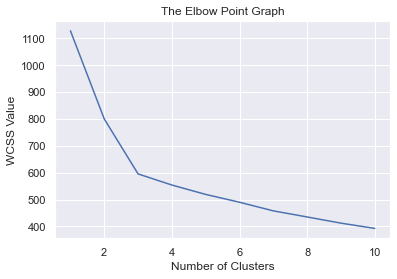

In [20]:
#plot an elbow graph to find the cluster with minimum value
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Value')
plt.show()

In [21]:
#Clustering
kmeans = KMeans(n_clusters=3,init= 'k-means++',random_state = 42)
y_means = kmeans.fit_predict(X)

In [22]:
#Visualization
pca = PCA(n_components =2)
reduced_x = pd.DataFrame(pca.fit_transform(X), columns=["PC1" , "PC2"])
reduced_x

,PC1,PC2
0,2.942002,0.321068
1,2.800070,1.334470
2,2.928574,0.002326
3,1.928293,0.062585
4,2.976036,1.341346
...,...,...
89,-2.168780,2.337277
90,-1.173377,3.284568
91,-3.160947,1.536128
92,-1.872202,3.307222


In [23]:
reduced_x['cluster'] = y_means
reduced_x

,PC1,PC2,cluster
0,2.942002,0.321068,1
1,2.800070,1.334470,1
2,2.928574,0.002326,1
3,1.928293,0.062585,1
4,2.976036,1.341346,1
...,...,...,...
89,-2.168780,2.337277,0
90,-1.173377,3.284568,0
91,-3.160947,1.536128,0
92,-1.872202,3.307222,0


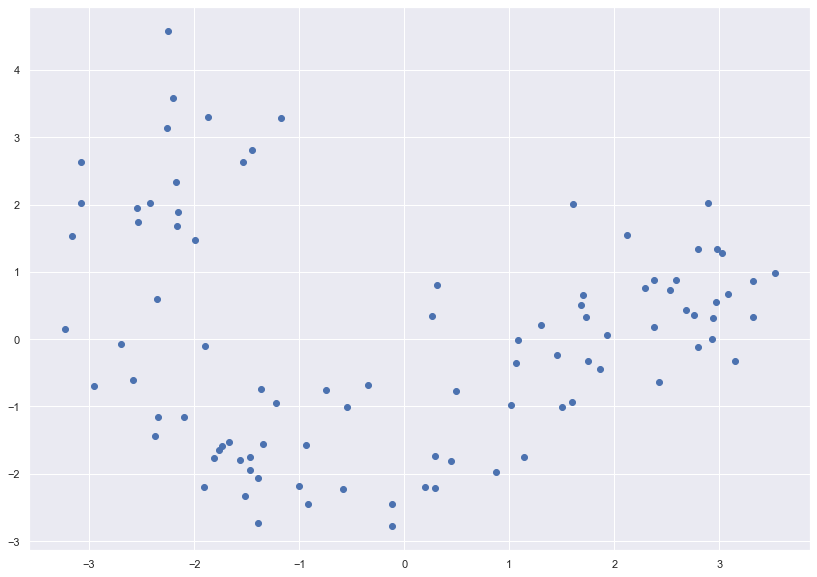

In [24]:
plt.figure(figsize=(14,10))
plt.scatter(reduced_x['PC1'], reduced_x['PC2'])

In [25]:
kmeans.cluster_centers_

array([[ 0.06999552,  1.06571509,  0.06586976,  0.48014762,  0.04912153,
        -1.1282944 ,  1.0584706 , -1.14237765,  0.99868321, -1.37012861,
        -1.5677379 , -0.42043407],
       [ 0.84768149, -0.16267216,  0.42210173, -0.67354719,  0.69960172,
         0.82094994, -0.63653385,  0.55398442,  0.39962982,  0.37052711,
         0.62997692,  1.05681797],
       [-0.90653544, -0.38019039, -0.46733489,  0.44518888, -0.74373444,
        -0.26374335,  0.11019851,  0.01766939, -0.92326795,  0.3230382 ,
         0.15805128, -0.86948205]])

In [26]:
reduced_centers = pca.transform(kmeans.cluster_centers_)
reduced_centers

array([[-2.29456447,  2.28274334],
       [ 2.20326302,  0.39543066],
       [-1.08452081, -1.57833753]])

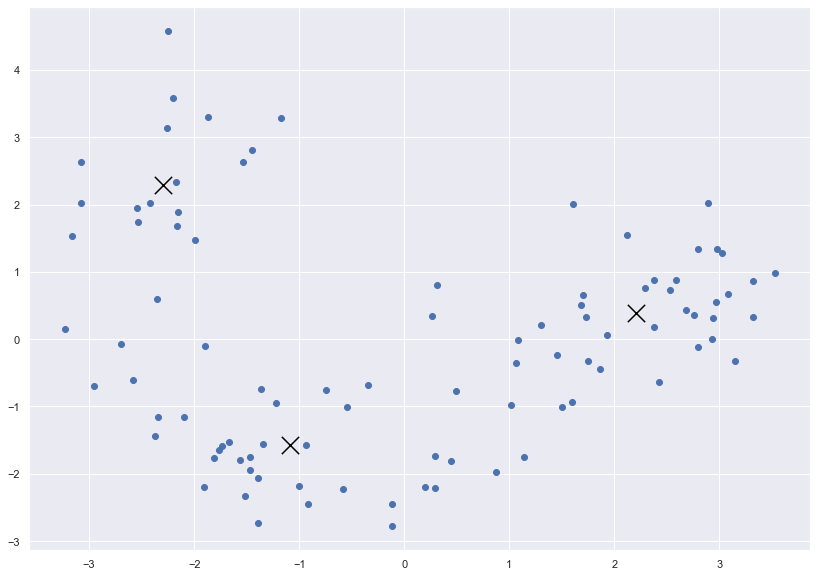

In [27]:
plt.figure(figsize=(14,10))
plt.scatter(reduced_x['PC1'], reduced_x['PC2'])
plt.scatter(reduced_centers[:, 0] , reduced_centers[:, 1] , color='black' , marker='x' , s=300)
plt.show()

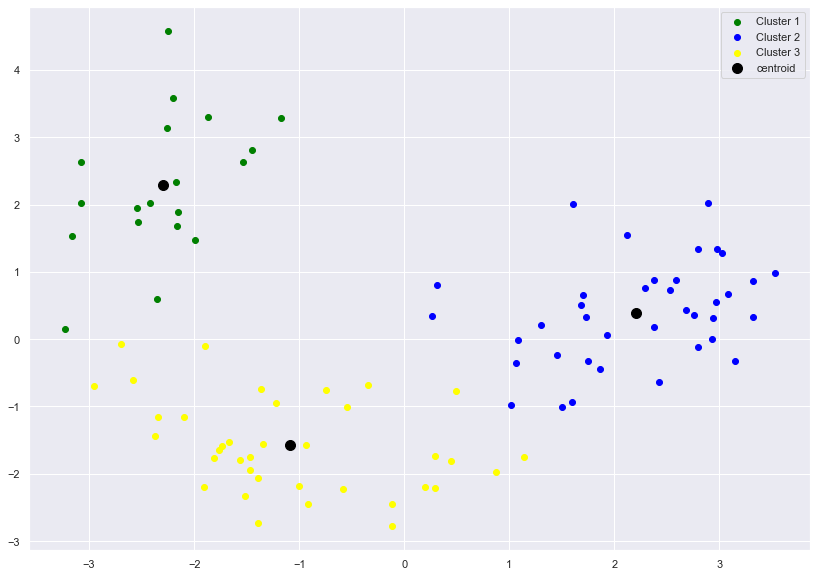

In [28]:
plt.figure(figsize=(14,10))

plt.scatter(reduced_x[reduced_x['cluster'] == 0].loc[:, 'PC1'] , reduced_x[reduced_x['cluster'] == 0].loc[:, 'PC2'] , c='green', label='Cluster 1')
plt.scatter(reduced_x[reduced_x['cluster'] == 1].loc[:, 'PC1'] , reduced_x[reduced_x['cluster'] == 1].loc[:, 'PC2'] , c='blue', label='Cluster 2')
plt.scatter(reduced_x[reduced_x['cluster'] == 2].loc[:, 'PC1'] , reduced_x[reduced_x['cluster'] == 2].loc[:, 'PC2'] , c='yellow', label='Cluster 3')

plt.scatter(reduced_centers[:, 0] , reduced_centers[:, 1] , color='black' , s=100, label = "centroid")
#plt.show()
plt.legend()

In [29]:
from sklearn.metrics import f1_score
print("F1 score is:", f1_score(y_means, y.values,average='micro'))

F1 score is: 0.7978723404255319


In [30]:
dataset = pd.DataFrame({'Original': y.values, 'Predicted': y_means}, columns=['Original', 'Predicted'])

In [31]:
dataset.loc[dataset['Predicted'] == 0, 'Predicted'] = 3

In [32]:
dataset

,Original,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
89,3,3
90,3,3
91,3,3
92,3,3


In [33]:
#print(dataset)
da = dataset.values
gcount = 0
bcount = 0
for df in da:
    if df[0] == df[1]:
        gcount +=1
    else:
        bcount +=1
print(gcount)
print(bcount)

92
2


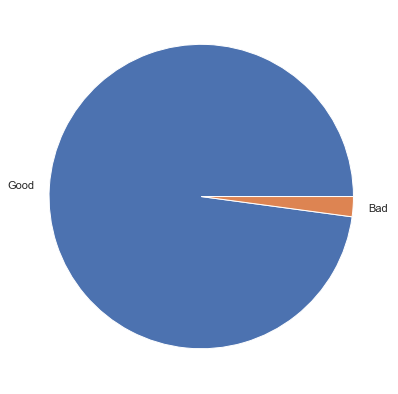

In [34]:
data = [gcount, bcount]
labels = ["Good", "Bad"]
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = labels)
plt.show()

In [36]:
import pickle

In [37]:
pickle.dump(kmeans,open("cluster_model.pk1","wb"))